# Data Exploration: Telco Customer Churn

## Objective
Understand the structure, quality, and patterns in our customer churn dataset before cleaning and feature engineering.

## Steps
1. Load and inspect data
2. Check data types and missing values
3. Analyze distributions
4. Explore relationships with churn
5. Identify data quality issues

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
from pathlib import Path

sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

%matplotlib inline

In [2]:
with open('../config.json', 'r') as f:
    config = json.load(f)

raw_data_path = Path(config['paths']['raw_data'])

## 1. Load Data

In [3]:
df = pd.read_csv(raw_data_path / 'customer_behavior.csv')
print(f"Dataset shape: {df.shape}")
df.head()

Dataset shape: (7043, 21)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## 2. Basic Information

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [6]:
df.describe(include='object')

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,6531,2
top,7590-VHVEG,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,,No
freq,1,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,11,5174


## 3. Missing Values

In [7]:
missing = df.isnull().sum()
missing_pct = 100 * missing / len(df)
missing_df = pd.DataFrame({
    'Missing Count': missing,
    'Percentage': missing_pct
})
missing_df = missing_df[missing_df['Missing Count'] > 0].sort_values('Missing Count', ascending=False)
print(missing_df)

Empty DataFrame
Columns: [Missing Count, Percentage]
Index: []


## 4. Target Variable Analysis

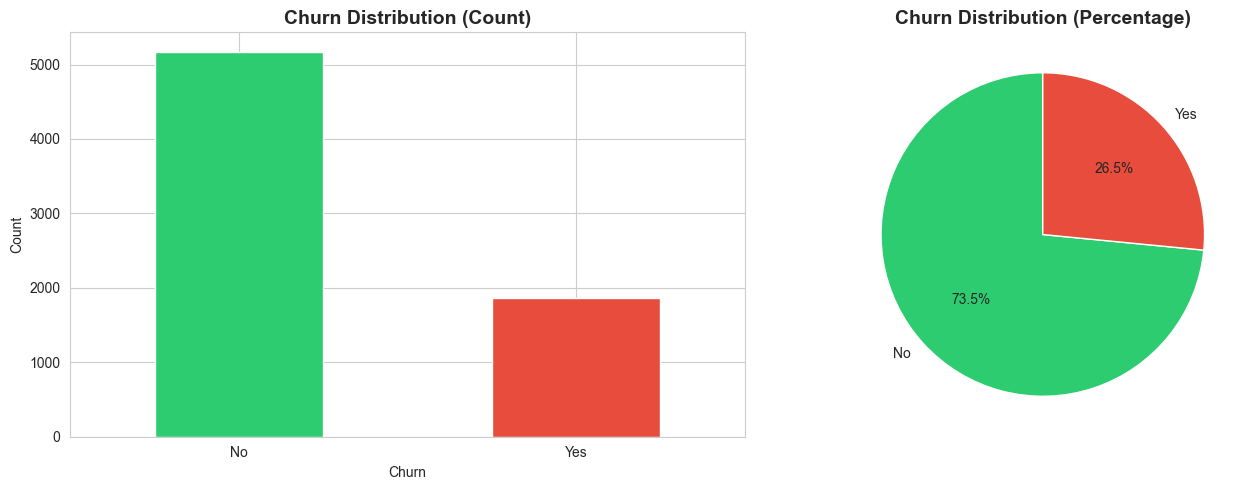


Churn Rate: 26.54%


In [8]:
churn_counts = df['Churn'].value_counts()
churn_pct = 100 * churn_counts / len(df)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

churn_counts.plot(kind='bar', ax=ax1, color=['#2ecc71', '#e74c3c'])
ax1.set_title('Churn Distribution (Count)', fontsize=14, fontweight='bold')
ax1.set_xlabel('Churn')
ax1.set_ylabel('Count')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=0)

ax2.pie(churn_counts, labels=churn_counts.index, autopct='%1.1f%%', 
        colors=['#2ecc71', '#e74c3c'], startangle=90)
ax2.set_title('Churn Distribution (Percentage)', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

print(f"\nChurn Rate: {churn_pct['Yes']:.2f}%")

## 5. Numerical Features

In [10]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
print(f"Numerical columns: {list(numeric_cols)}")

Numerical columns: ['SeniorCitizen', 'tenure', 'MonthlyCharges']


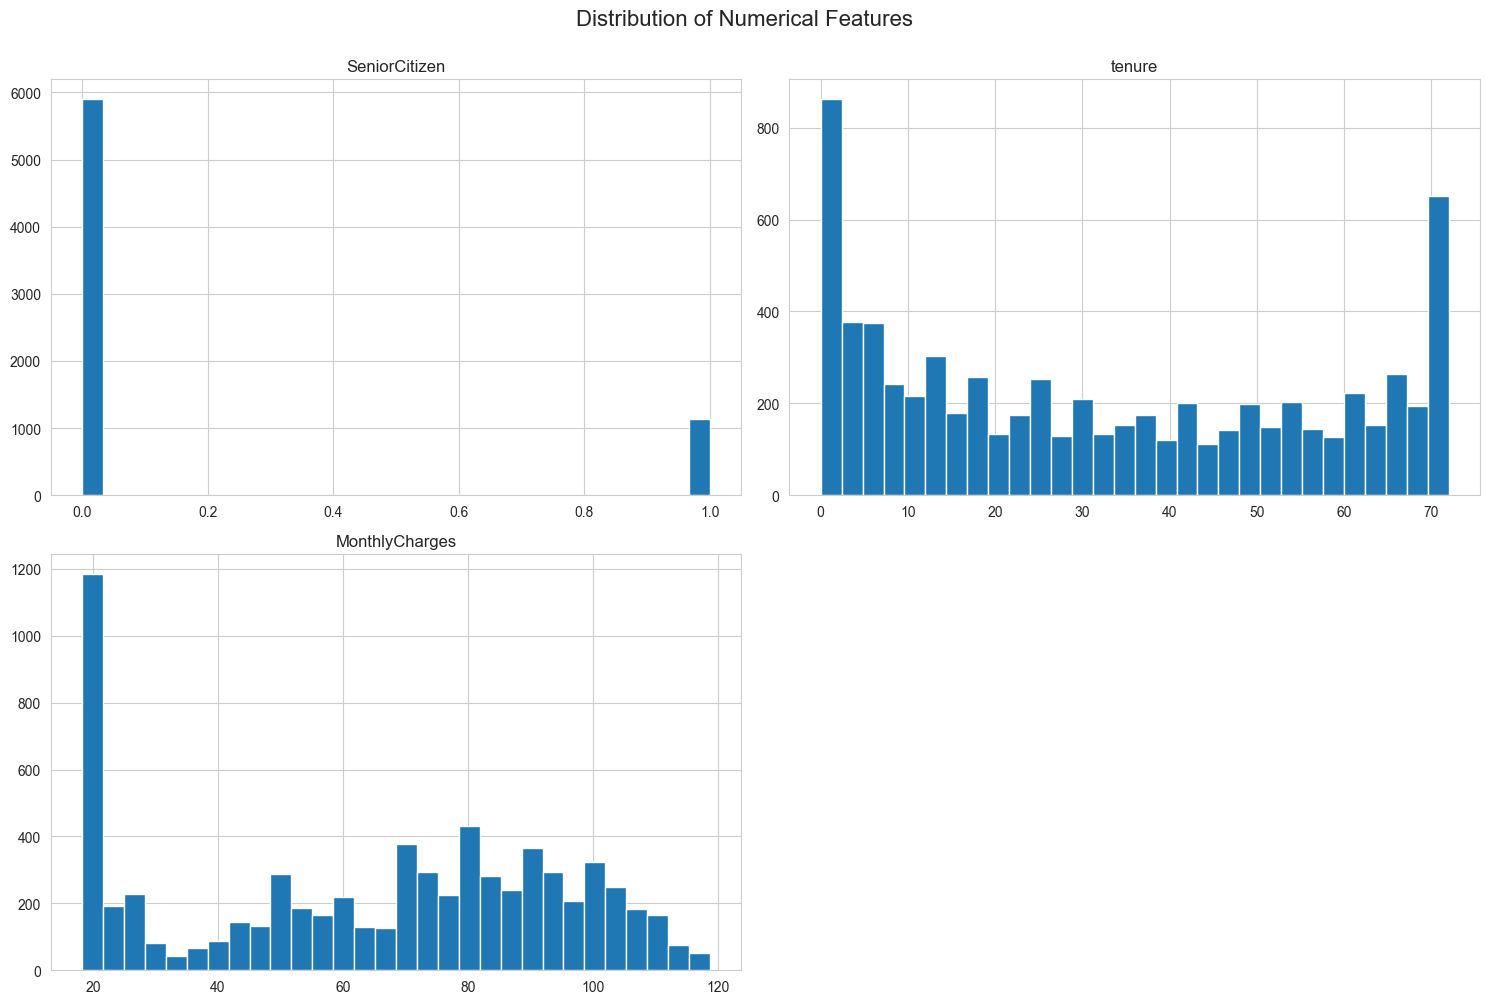

In [11]:
df[numeric_cols].hist(bins=30, figsize=(15, 10))
plt.suptitle('Distribution of Numerical Features', fontsize=16, y=1.00)
plt.tight_layout()
plt.show()

## 6. Categorical Features

In [12]:
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
categorical_cols.remove('customerID')
if 'Churn' in categorical_cols:
    categorical_cols.remove('Churn')

print(f"Categorical columns ({len(categorical_cols)}): {categorical_cols}")

Categorical columns (16): ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges']


In [13]:
for col in categorical_cols[:5]:
    print(f"\n{col}:")
    print(df[col].value_counts())
    print("-" * 40)


gender:
gender
Male      3555
Female    3488
Name: count, dtype: int64
----------------------------------------

Partner:
Partner
No     3641
Yes    3402
Name: count, dtype: int64
----------------------------------------

Dependents:
Dependents
No     4933
Yes    2110
Name: count, dtype: int64
----------------------------------------

PhoneService:
PhoneService
Yes    6361
No      682
Name: count, dtype: int64
----------------------------------------

MultipleLines:
MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: count, dtype: int64
----------------------------------------


## 7. Churn by Categorical Features

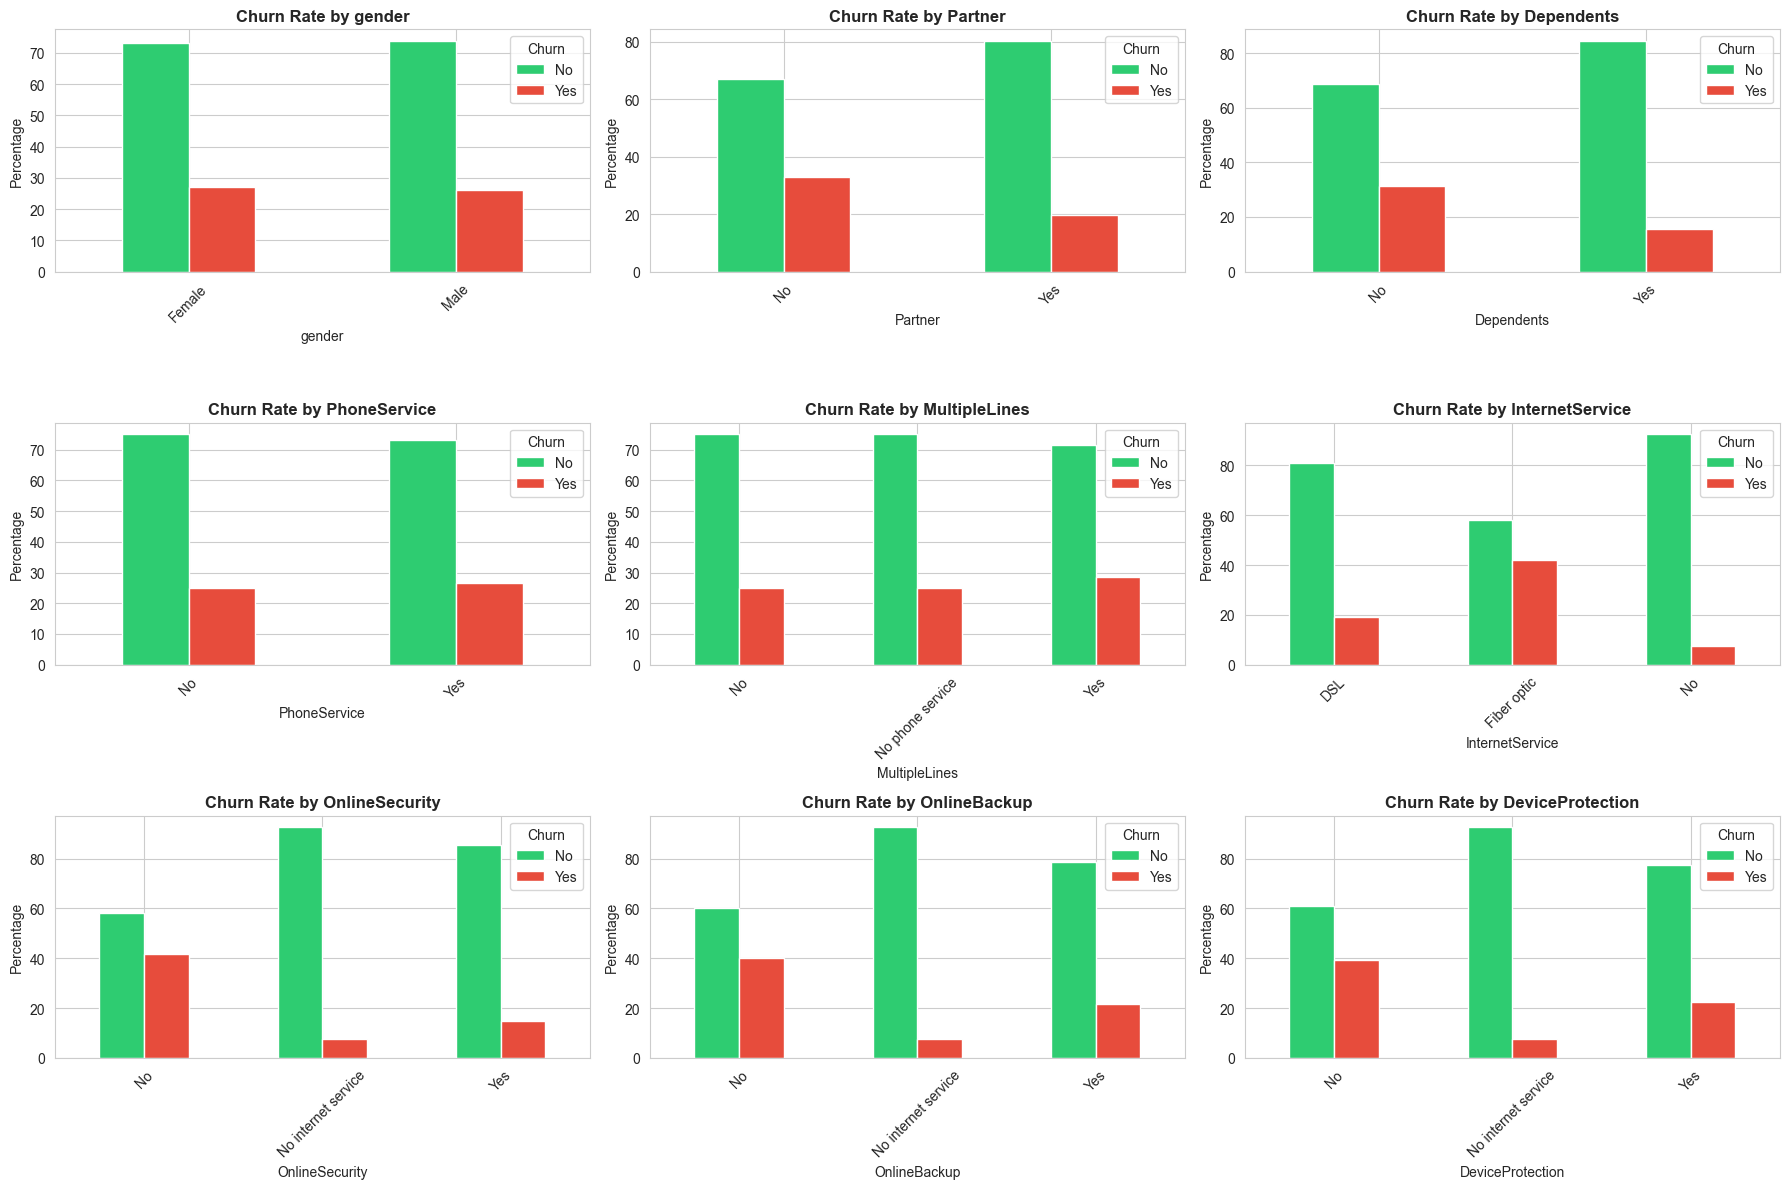

In [14]:
fig, axes = plt.subplots(3, 3, figsize=(18, 12))
axes = axes.flatten()

for idx, col in enumerate(categorical_cols[:9]):
    churn_by_cat = pd.crosstab(df[col], df['Churn'], normalize='index') * 100
    churn_by_cat.plot(kind='bar', ax=axes[idx], color=['#2ecc71', '#e74c3c'])
    axes[idx].set_title(f'Churn Rate by {col}', fontweight='bold')
    axes[idx].set_ylabel('Percentage')
    axes[idx].legend(title='Churn', labels=['No', 'Yes'])
    axes[idx].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

## 8. Correlation Analysis

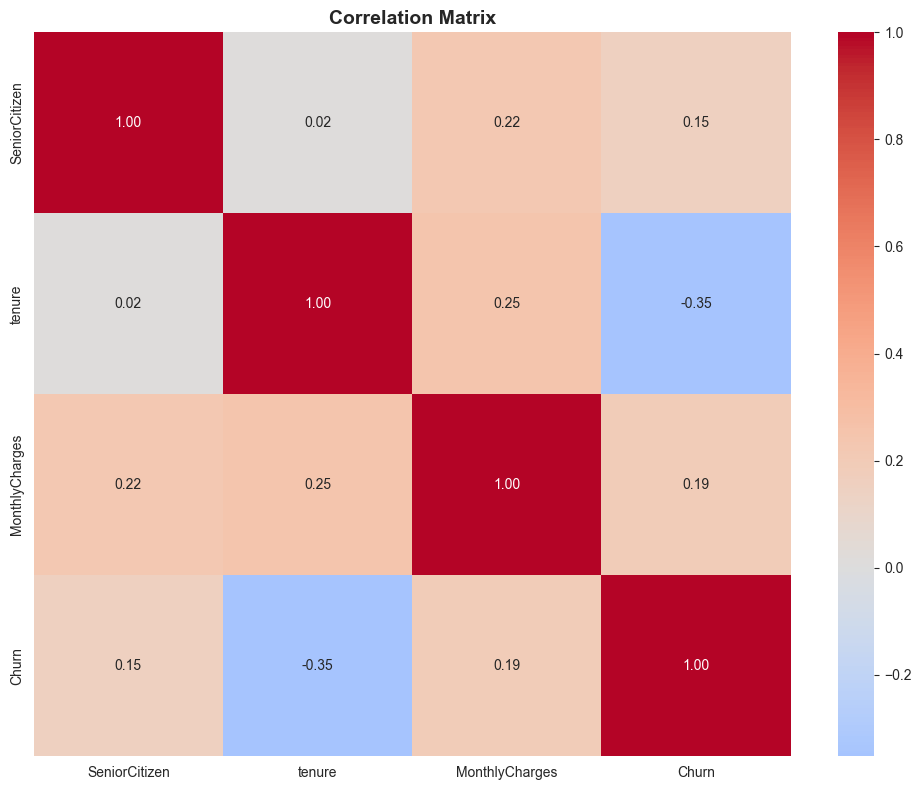

In [15]:
df_encoded = df.copy()
df_encoded['Churn'] = (df_encoded['Churn'] == 'Yes').astype(int)

for col in categorical_cols:
    if df[col].nunique() == 2:
        df_encoded[col] = (df_encoded[col] == df[col].unique()[0]).astype(int)

corr_matrix = df_encoded[numeric_cols.tolist() + ['Churn']].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0)
plt.title('Correlation Matrix', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

## 9. Data Quality Issues

In [16]:
print("Checking for duplicates...")
duplicates = df.duplicated(subset=['customerID']).sum()
print(f"Duplicate customer IDs: {duplicates}")

print("\nChecking data types...")
print(df.dtypes)

print("\nChecking for inconsistencies...")
print(f"TotalCharges data type: {df['TotalCharges'].dtype}")
print(f"Sample TotalCharges values: {df['TotalCharges'].head(10).tolist()}")

Checking for duplicates...
Duplicate customer IDs: 0

Checking data types...
customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

Checking for inconsistencies...
TotalCharges data type: object
Sample TotalCharges values: ['29.85', '1889.5', '108.15', '1840.75', '151.65', '820.5', '1949.4', '301.9', '3046.05', '3487.95']


In [17]:
non_numeric_charges = df[pd.to_numeric(df['TotalCharges'], errors='coerce').isna()]
print(f"\nRows with non-numeric TotalCharges: {len(non_numeric_charges)}")
if len(non_numeric_charges) > 0:
    print(non_numeric_charges[['customerID', 'tenure', 'MonthlyCharges', 'TotalCharges']].head())


Rows with non-numeric TotalCharges: 11
      customerID  tenure  MonthlyCharges TotalCharges
488   4472-LVYGI       0           52.55             
753   3115-CZMZD       0           20.25             
936   5709-LVOEQ       0           80.85             
1082  4367-NUYAO       0           25.75             
1340  1371-DWPAZ       0           56.05             


## 10. Key Findings Summary

In [18]:
print("="*60)
print("KEY FINDINGS")
print("="*60)
print(f"\n1. Dataset Size: {len(df)} customers, {len(df.columns)} features")
print(f"2. Churn Rate: {100 * (df['Churn'] == 'Yes').sum() / len(df):.2f}%")
print(f"3. Missing Values: {missing[missing > 0].sum()} total missing values")
print(f"4. Data Quality Issues:")
print(f"   - TotalCharges stored as object (should be numeric)")
print(f"   - {len(non_numeric_charges)} rows with invalid TotalCharges")
print(f"5. Features: {len(numeric_cols)} numeric, {len(categorical_cols)} categorical")
print(f"\nNext Steps:")
print("- Convert TotalCharges to numeric")
print("- Handle missing/invalid values")
print("- Engineer new features")
print("- Encode categorical variables")
print("="*60)

KEY FINDINGS

1. Dataset Size: 7043 customers, 21 features
2. Churn Rate: 26.54%
3. Missing Values: 0 total missing values
4. Data Quality Issues:
   - TotalCharges stored as object (should be numeric)
   - 11 rows with invalid TotalCharges
5. Features: 3 numeric, 16 categorical

Next Steps:
- Convert TotalCharges to numeric
- Handle missing/invalid values
- Engineer new features
- Encode categorical variables
